### IPD440 - APRENDIZAJE DE MAQUINAS
# Tarea 3

Nombre: Daniel Barriga Villanueva      
Rol:202030517-K       
Rut:20.731.884-1      
Correo: daniel.barriga@usm.cl

## Introducción

El objetivo de esta tarea es construir una red neuronal de tipo autoencoder para detectar anomalías en datos de series temporales.

## Librerías

Importar todas las librerías que necesitará para el trabajo. Asegúrese de tenerlas instaladas previamente. 

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

2023-11-02 00:09:50.930636: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-02 00:09:50.933203: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 00:09:50.996661: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 00:09:51.000549: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 00:09:52.723473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## Dataset

Cargar datos de entrenamiento desde `NoAnomaly.csv`.

In [2]:
df_NoAnomaly = pd.read_csv("NoAnomaly.csv")

Graficar los datos de entrenamiento `df_NoAnomaly` en un `plot`:

In [3]:
plt.plot(df_NoAnomaly['value'])
plt.xlabel('Índice')
plt.ylabel('Value')
plt.title('Gráfico de los Datos en df_NoAnomaly')
plt.show()

Cargar datos de testing desde `WithAnomaly.csv`.

In [4]:
df_WithAnomaly = pd.read_csv("WithAnomaly.csv")

Graficar los datos de testing `df_WithAnomaly` en un `plot`:

In [5]:
plt.plot(df_WithAnomaly['value'])
plt.xlabel('Índice')
plt.ylabel('Value')
plt.title('Gráfico de los Datos en df_WithAnomaly')
plt.show()

## Crear secuencias 

Usando la función `create_sequences()`, genere `x_train` con el DataFrame `df_NoAnomaly`.

In [6]:
def create_sequences(df, time_steps=288):
    output = []
    for i in range(len(df) - time_steps + 1):
        output.append(df.values[i : (i + time_steps)])
    return np.stack(output)

In [7]:
x_train = create_sequences(df_NoAnomaly, time_steps=288)

In [8]:
x_train

array([[[-0.85882857],
        [-0.72899302],
        [-0.84814772],
        ...,
        [-0.86453747],
        [-0.81250829],
        [-0.79671155]],

       [[-0.72899302],
        [-0.84814772],
        [-0.72958579],
        ...,
        [-0.81250829],
        [-0.79671155],
        [-0.78767946]],

       [[-0.84814772],
        [-0.72958579],
        [-0.731173  ],
        ...,
        [-0.79671155],
        [-0.78767946],
        [-0.73706287]],

       ...,

       [[-0.8226548 ],
        [-0.86660975],
        [-0.82181363],
        ...,
        [-0.79164661],
        [-0.78025492],
        [-0.83364049]],

       [[-0.86660975],
        [-0.82181363],
        [-0.75595835],
        ...,
        [-0.78025492],
        [-0.83364049],
        [-0.73510213]],

       [[-0.82181363],
        [-0.75595835],
        [-0.74256753],
        ...,
        [-0.83364049],
        [-0.73510213],
        [-0.8460886 ]]])

## Construir un modelo

Construir una red neuronal de tipo Autoencoder convolucional con las siguientes características:

- Modelo tipo `Sequential`.
- Capa `Input` con `shape=(x_train.shape[1], x_train.shape[2])`.
- Capa `Conv1D` con `filters=32, kernel_size=7, padding="same", strides=2, activation="relu"`.
- Capa `Dropout` con `rate=0.2`.
- Capa `Conv1D` con `filters=16, kernel_size=7, padding="same", strides=2, activation="relu"`.
- Capa `Conv1DTranspose` con `filters=16, kernel_size=7, padding="same", strides=2, activation="relu"`.
- Capa `Dropout` con `rate=0.2`.
- Capa `Conv1DTranspose` con `filters=16, kernel_size=7, padding="same", strides=2, activation="relu"`.
- Capa `Conv1DTranspose` con `filters=1, kernel_size=7, padding="same"`.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, Dropout, Conv1DTranspose

In [10]:
input_shape = (x_train.shape[1], x_train.shape[2])

# Construcción del modelo
model = Sequential([
    Input(shape=input_shape),
    Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
    Dropout(0.2),
    Conv1D(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    Dropout(0.2),
    Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    Conv1DTranspose(filters=1, kernel_size=7, padding="same")
])

# Visualización del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTr  (None, 144, 16)           1808      
 anspose)                                                        
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1D  (None, 288, 16)           1808      
 Transpose)                                             

Compilar el modelo con Optimizador `Adam`, y `loss="mse"`.

In [11]:
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTr  (None, 144, 16)           1808      
 anspose)                                                        
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1D  (None, 288, 16)           1808      
 Transpose)                                             

## Entrenar el modelo

Entrenar (`fit`) el modelo con 10 `epochs`. Tenga en cuenta que debe utilizar `x_train` como entrada y como destino, ya que se trata de un modelo de reconstrucción.

In [12]:
history = model.fit(
    x_train, 
    x_train, 
    epochs=10,
    batch_size=32,
    shuffle=True
)


Epoch 1/10
118/118 [==============================] - 2s 8ms/step - loss: 0.1674
Epoch 2/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0408
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0297
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0242
Epoch 5/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0208
Epoch 6/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0185
Epoch 7/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0163
Epoch 8/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0145
Epoch 9/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0127
Epoch 10/10
118/118 [==============================] - 1s 8ms/step - loss: 0.0112


Graficar el loss versus epochs.

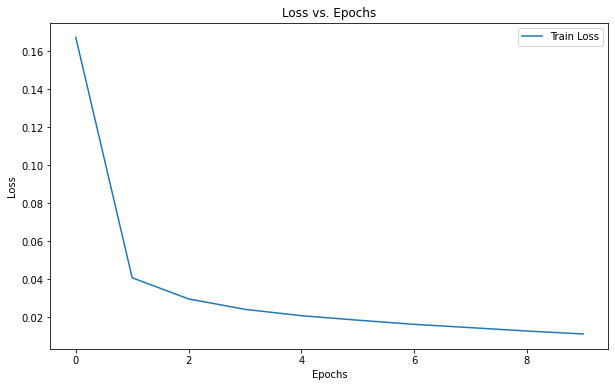

In [13]:
loss = history.history['loss']

# Graficar la pérdida vs. épocas
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Train Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Detectando anomalías

Realizar una predicción (`predict`) usando su modelo ya entrenado sobre los datos de entrenamiento `x_train` y genere `x_train_pred`.

In [14]:
x_train_pred = model.predict(x_train, verbose=False)

In [15]:
x_train_pred

array([[[-0.7379365 ],
        [-0.72847044],
        [-0.75068057],
        ...,
        [-0.78671426],
        [-0.74811816],
        [-0.7640035 ]],

       [[-0.72017676],
        [-0.71924376],
        [-0.73447585],
        ...,
        [-0.78284866],
        [-0.74173725],
        [-0.75108063]],

       [[-0.7205908 ],
        [-0.7237226 ],
        [-0.7325696 ],
        ...,
        [-0.7815462 ],
        [-0.7427632 ],
        [-0.7506895 ]],

       ...,

       [[-0.74855447],
        [-0.72677386],
        [-0.7508687 ],
        ...,
        [-0.7859549 ],
        [-0.74850243],
        [-0.7635641 ]],

       [[-0.73805416],
        [-0.73623335],
        [-0.74726653],
        ...,
        [-0.78342533],
        [-0.7420122 ],
        [-0.75007176]],

       [[-0.7167666 ],
        [-0.72806245],
        [-0.73301065],
        ...,
        [-0.78855515],
        [-0.75318974],
        [-0.7647685 ]]], dtype=float32)

## Comparar reconstrucción

Elegir 10 muestras del conjunto de entrenamiento `x_train` y muestre un subgráfico por cada una con dos curvas de diferentes colores superpuestas, una para el dato real y otra para la predicción de ese mismo día.

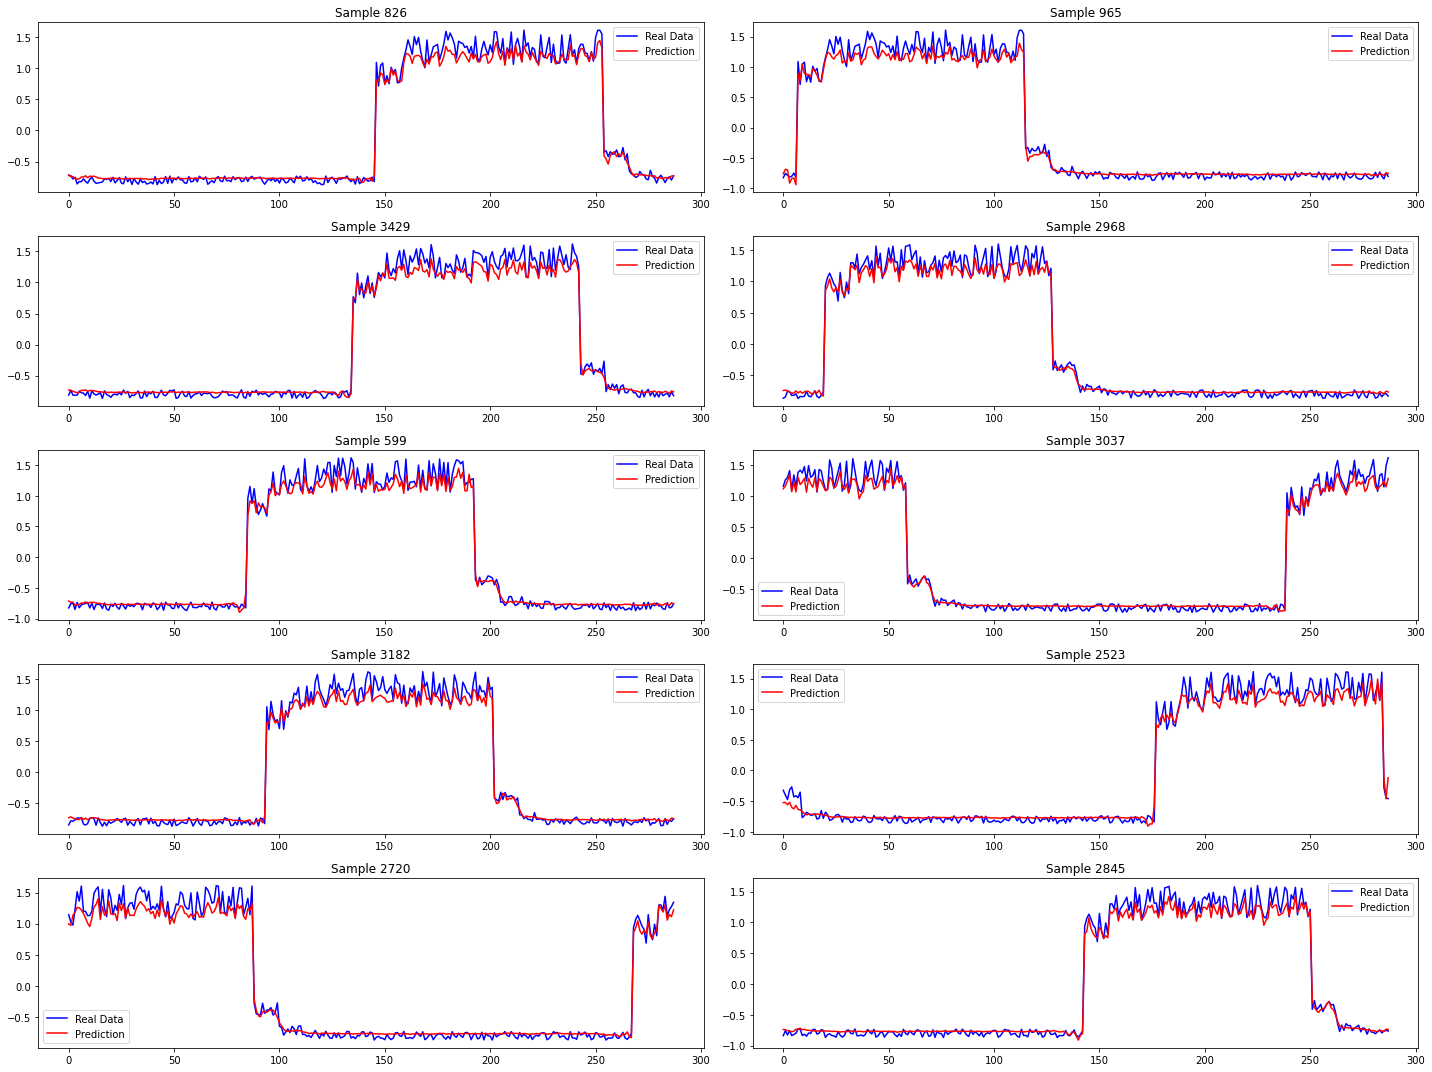

In [16]:
np.random.seed(0)  
random_indices = np.random.choice(x_train.shape[0], 10, replace=False)

# Crear subgráficos para las 10 muestras
plt.figure(figsize=(20, 15))

for i, idx in enumerate(random_indices, 1):
    data_sample = x_train[idx].flatten()
    predicted_sample = x_train_pred[idx].flatten()
    plt.subplot(5, 2, i)
    plt.plot(data_sample, label='Real Data', color='blue')
    plt.plot(predicted_sample, label='Prediction', color='red')
    plt.title(f"Sample {idx}")
    plt.legend()

plt.tight_layout()
plt.show()

## Preparar datos de prueba

Usando la función `create_sequences()`, genere `x_test` con el DataFrame `df_WithAnomaly`.

In [17]:
x_test = create_sequences(df_WithAnomaly)

In [18]:
x_test

array([[[-0.80767185],
        [-0.78133079],
        [-0.80053474],
        ...,
        [-0.84984182],
        [-0.84637559],
        [-0.86378412]],

       [[-0.78133079],
        [-0.80053474],
        [-0.74609097],
        ...,
        [-0.84637559],
        [-0.86378412],
        [-0.74187577]],

       [[-0.80053474],
        [-0.74609097],
        [-0.792482  ],
        ...,
        [-0.86378412],
        [-0.74187577],
        [-0.79336052]],

       ...,

       [[-0.82278269],
        [-0.80756241],
        [-0.78271553],
        ...,
        [-0.86774221],
        [-0.76348065],
        [-0.7789844 ]],

       [[-0.80756241],
        [-0.78271553],
        [-0.86038742],
        ...,
        [-0.76348065],
        [-0.7789844 ],
        [-0.86134756]],

       [[-0.78271553],
        [-0.86038742],
        [-0.73531485],
        ...,
        [-0.7789844 ],
        [-0.86134756],
        [-0.73281036]]])

Realizar una predicción (`predict`) usando su modelo ya entrenado sobre los datos de testing `x_test` y genere `x_test_pred`.

In [19]:
x_test_pred = model.predict(x_test)

118/118 [==============================] - 0s 3ms/step


In [20]:
x_test_pred

array([[[-0.73285127],
        [-0.7283387 ],
        [-0.7452002 ],
        ...,
        [-0.79429924],
        [-0.75532776],
        [-0.7722592 ]],

       [[-0.7291491 ],
        [-0.72314656],
        [-0.73756224],
        ...,
        [-0.7845776 ],
        [-0.74699163],
        [-0.75463367]],

       [[-0.7298095 ],
        [-0.7285186 ],
        [-0.74124354],
        ...,
        [-0.7896041 ],
        [-0.75137675],
        [-0.7618482 ]],

       ...,

       [[-0.7364263 ],
        [-0.74347675],
        [-0.74928075],
        ...,
        [-0.7867716 ],
        [-0.7497475 ],
        [-0.76115507]],

       [[-0.7371536 ],
        [-0.73197705],
        [-0.75247765],
        ...,
        [-0.7935282 ],
        [-0.7489575 ],
        [-0.7636211 ]],

       [[-0.736234  ],
        [-0.7301839 ],
        [-0.74917954],
        ...,
        [-0.783184  ],
        [-0.74072003],
        [-0.7527237 ]]], dtype=float32)

## Detectar anomalías

Usando la función `anomalous_data_indices()` obtenga un nuevo DataFrame con los valores que el modelo detecta como anomalía. Esta función compara las predicciones con el máximo valor del conjunto de entrenamiento y define un umbral de acuerdo a la pérdida, entregando los índices de los días donde detecta valores atípicos.

In [21]:
def anomalous_data_indices(df, x_train, x_test, x_train_pred, x_test_pred, time_steps=288):  
    train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)
    test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1).reshape(-1)
    anomalies = test_mae_loss > np.max(train_mae_loss)
    indices = []    
    for data_idx in range(time_steps - 1, len(df) - time_steps + 1):
        if np.all(anomalies[data_idx - time_steps + 1 : data_idx]):
            indices.append(data_idx)
    df_subset = df.iloc[indices]
    return df_subset

In [22]:
anomalous_data = anomalous_data_indices(df_WithAnomaly, x_train, x_test, x_train_pred, x_test_pred)

In [23]:
anomalous_data

value
2989  2.609504
2990  2.847445
2991  3.021065
2992  2.803693
2993  2.779135
...        ...
3092  4.044957
3093  4.363308
3094  3.679861
3095  4.254443
3096  0.088165

[108 rows x 1 columns]

## Graficar anomalías

Generar un gráfico con dos curvas de diferentes colores superpuestas, una para todos los datos de testing `df_WithAnomaly` y otra para los datos detectados como anomalías por la función anterior.

Se realizan 2 tipos de grafica de anomalia:
* Anomalias representada por puntos en la curva:

In [24]:
all_test_data = df_WithAnomaly['value'].values
anomaly_data = anomalous_data['value'].values

# Preparar los índices de las anomalías para el gráfico
anomaly_indices = anomalous_data.index

plt.figure(figsize=(15, 6))

# Graficar todos los datos de prueba
plt.plot(all_test_data, label='Testing Data', color='blue')

# Superponer los puntos detectados como anomalías
plt.scatter(anomaly_indices, anomaly_data, color='red', label='Anomalies')

plt.title('Anomaly Detection')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

* Anomalias representadas por una curva.

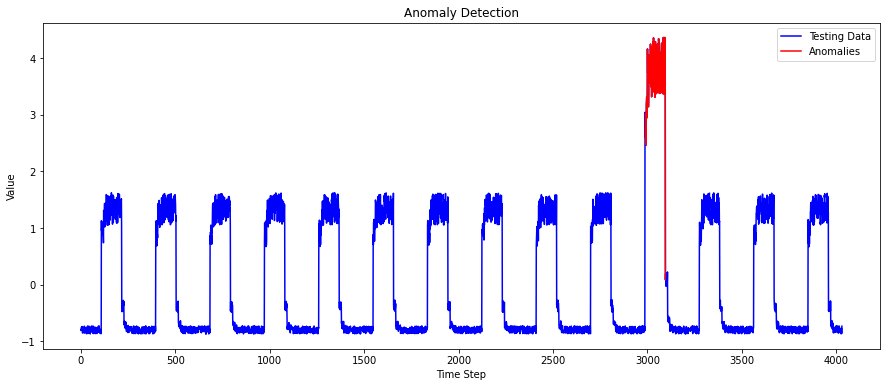

In [25]:
import numpy as np

# Crear una serie con NaNs para los valores de anomalías
anomaly_curve = np.full_like(all_test_data, np.nan)

# Rellenar la serie de anomalías solo en los índices detectados como anómalos
anomaly_curve[anomaly_indices] = anomaly_data

plt.figure(figsize=(15, 6))

# Graficar todos los datos de prueba
plt.plot(all_test_data, label='Testing Data', color='blue')

# Graficar la curva de anomalías
plt.plot(anomaly_curve, label='Anomalies', color='red')

plt.title('Anomaly Detection')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()


## Análisis y conclusiones

Brevemente comente los resultados obtenidos.

**Análisis de Resultados (Revisado):**

El gráfico titulado "Anomaly Detection" muestra la capacidad del modelo de autoencoder para detectar anomalías en un conjunto de datos de series temporales.

1. **Patrón general de los datos:** 
   Observando la curva azul (Testing Data), se destaca un patrón cíclico repetitivo que parece ser la norma en estos datos. Este es un patrón que el modelo de autoencoder habría aprendido durante su fase de entrenamiento, y se espera que pueda reconstruir con precisión estos patrones durante la fase de prueba.

2. **Anomalías detectadas:** 
   La curva roja (Anomalies) muestra los puntos que el modelo identificó como anómalos. La región prominente hacia el extremo derecho de la gráfica muestra un comportamiento que difiere significativamente de la norma. Esta área marca una serie de valores que son considerablemente más altos que el promedio de los datos, lo que indica un comportamiento anómalo.

3. **Valores por encima del promedio:** 
   Dado que las anomalías detectadas se encuentran sustancialmente por encima del promedio de los demás datos, esto podría indicar eventos o situaciones fuera de lo común que afectaron la variable medida. Este tipo de desviaciones pronunciadas del promedio son cruciales para identificar, ya que pueden indicar eventos críticos, como picos de demanda, fallos de sistemas, o cualquier otro evento que cause un aumento significativo en los valores.

4. **Eficiencia del modelo:** 
   Antes del segmento donde se detecta la principal anomalía, hay pocos o ningún punto rojo en la gráfica. Esto sugiere que el modelo ha hecho un buen trabajo reconstruyendo la mayoría de los patrones normales en el conjunto de datos y no ha generado falsas alarmas.

5. **Importancia de la detección:** 
   Las desviaciones pronunciadas del promedio, como las detectadas, pueden tener significativas implicancias dependiendo del contexto de los datos. Si estos datos representan métricas operativas, este pico anómalo podría indicar una situación que requiere intervención o investigación inmediata.

6. **Consideraciones finales:** 
   Aunque el modelo ha demostrado ser eficaz en la detección de valores anómalos en este conjunto de datos, es vital validar su eficiencia con diferentes conjuntos o condiciones. El umbral que determina cuándo se considera un punto como anómalo podría ajustarse para adaptarse mejor a las necesidades específicas.